In [0]:
!pip install google_images_download

     |████████████████████████████████| 911kB 4.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [0]:
# importing google_images_download module 
from google_images_download import google_images_download 

# creating object 
response = google_images_download.googleimagesdownload() 

search_queries =[ 
	  'Marvel Loki',
    'Marvel Magneto',
    'Marvel Ultron',
    'Marvel Thanos',
    'Marvel Red Skull',
    'Marvel Mystique',
    'Marvel Venom',
] 


def downloadimages(query): 
	# keywords is the search query 
	# format is the image file format 
	# limit is the number of images to be downloaded 
	# print urs is to print the image file url 
	# size is the image size which can 
	# be specified manually ("large, medium, icon") 
	# aspect ratio denotes the height width ratio 
	# of images to download. ("tall, square, wide, panoramic")
	arguments = {"keywords": query, "format": "jpg", "limit":100, "print_urls":True}
	try: 
		response.download(arguments) 
	
	# Handling File NotFound Error	 
	except FileNotFoundError: 
		arguments = {"keywords": query, 
					"format": "jpg", 
					"limit":100, 
					"print_urls":True} 
					
		# Providing arguments for the searched query 
		try: 
			# Downloading the photos based 
			# on the given arguments 
			response.download(arguments) 
		except: 
			pass

# Driver Code 
for query in search_queries: 
	downloadimages(query) 
	print() 



Item no.: 1 --> Item name = Marvel Loki
Evaluating...
Starting Download...
Image URL: https://www.screengeek.net/wp-content/uploads/2019/01/loki-marvel-mcu.jpg
Completed Image ====> 1.loki-marvel-mcu.jpg
Image URL: https://www.sideshow.com/product-asset/903106/feature
Wrong image format returned. Skipping...
Image URL: https://terrigen-cdn-dev.marvel.com/content/prod/1x/_loki_card.jpg
Completed Image ====> 2._loki_card.jpg
Image URL: https://cdn.images.express.co.uk/img/dynamic/36/590x/Avengers-Loki-return-revealed-1020083.jpg?r=1537403858231
Completed Image ====> 3.Avengers-Loki-return-revealed-1020083.jpg
Image URL: https://www.indiewire.com/wp-content/uploads/2018/09/thorragnarok-trailerbreakdown-loki-chainedup.jpg?w=780
Completed Image ====> 4.thorragnarok-trailerbreakdown-loki-chainedup.jpg
Image URL: https://i.kinja-img.com/gawker-media/image/upload/s--wG9rR68Y--/c_scale,f_auto,fl_progressive,q_80,w_800/b7dinhqpllv6hingai8s.jpg
Completed Image ====> 5.b7dinhqpllv6hingai8s.jpg
Im

In [0]:
from fastai.vision import *

In [0]:
path = Path('/downloads/')

In [0]:
doc(verify_images)

In [0]:
for folder in ('Marvel Loki','Marvel Magneto','Marvel Ultron','Marvel Thanos','Marvel Red Skull','Marvel Mystique','Marvel Venom'):
    print(folder)
    verify_images(path/folder, delete=True, max_size=100)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder('downloads', train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['Marvel Loki',
 'Marvel Magneto',
 'Marvel Mystique',
 'Marvel Red Skull',
 'Marvel Thanos',
 'Marvel Ultron',
 'Marvel Venom']

In [0]:
doc(data.show_batch)

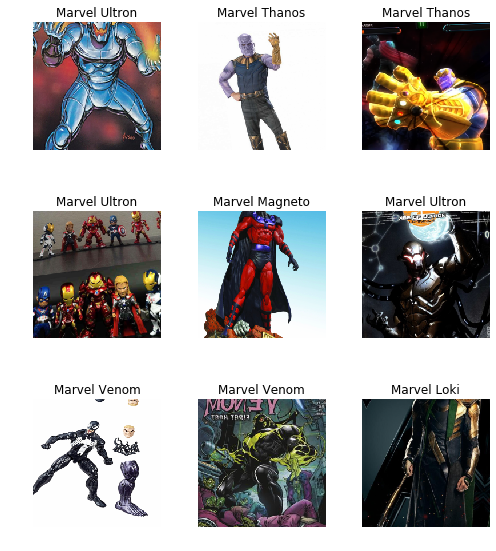

In [0]:
data.show_batch(rows=3, figsize=(7, 8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Marvel Loki',
  'Marvel Magneto',
  'Marvel Mystique',
  'Marvel Red Skull',
  'Marvel Thanos',
  'Marvel Ultron',
  'Marvel Venom'],
 7,
 466,
 116)

In [0]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [0]:
learn

In [0]:
doc(learn.fit_one_cycle)

In [0]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.088492,1.441110,0.500000,00:23
1,1.576923,0.882099,0.353448,00:23
2,1.260475,0.749016,0.284483,00:23
3,1.034748,0.730926,0.258621,00:23


In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


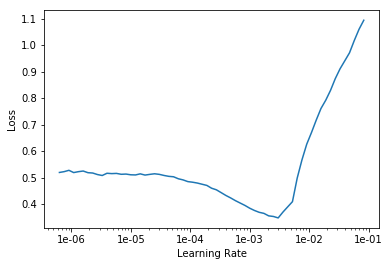

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.481286,0.660039,0.232759,00:23
1,0.434349,0.578982,0.172414,00:23
2,0.364619,0.552917,0.155172,00:23
3,0.313499,0.546498,0.163793,00:22


In [0]:
learn.save('villains-detection-stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

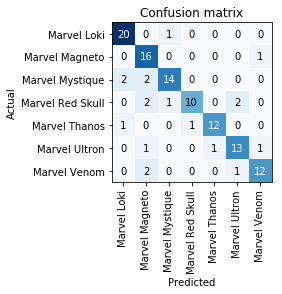

In [0]:
interp.plot_confusion_matrix()

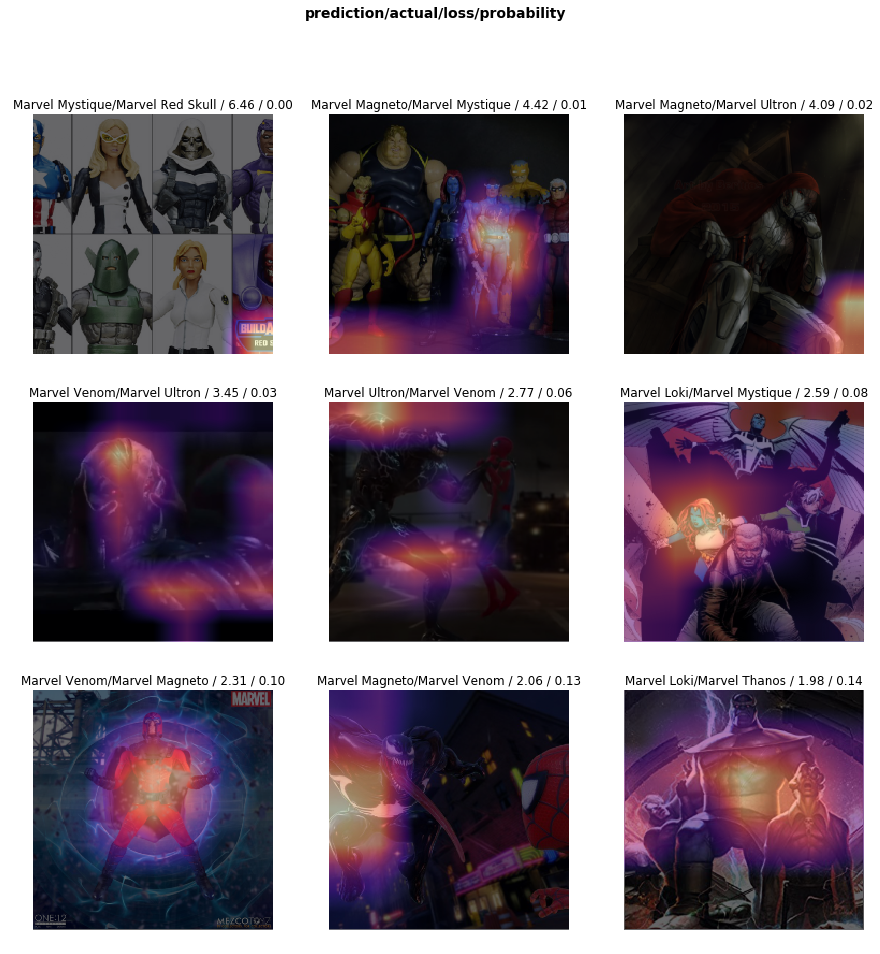

In [0]:
interp.plot_top_losses(9, figsize=(15,15))

In [0]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [0]:
learn

In [0]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,2.119710,1.464621,0.517241,00:22
1,1.543610,1.056207,0.327586,00:22


In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


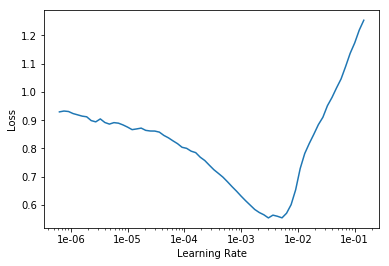

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.807218,0.849619,0.284483,00:22
1,0.672492,0.739570,0.250000,00:22


In [0]:
learn.save('villains-detection-stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

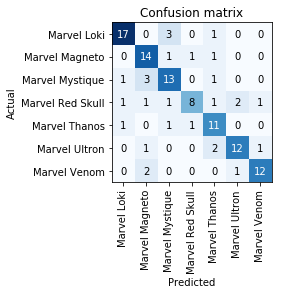

In [0]:
interp.plot_confusion_matrix()

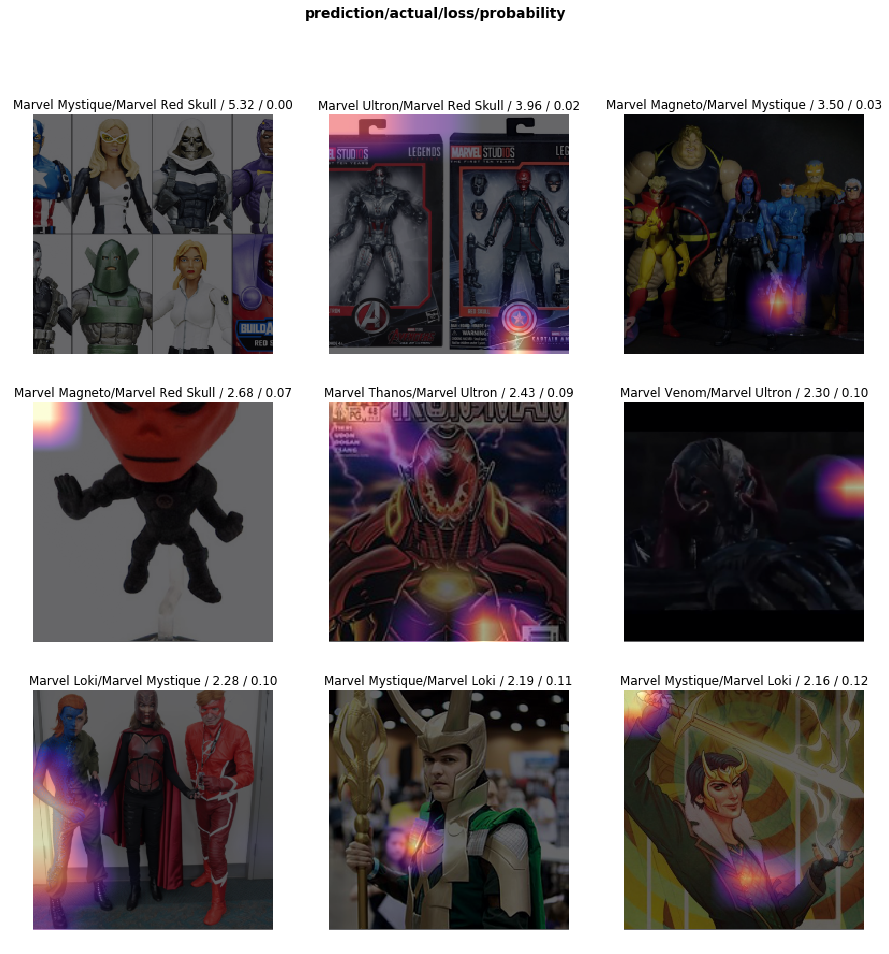

In [0]:
interp.plot_top_losses(9, figsize=(15,15))